## 第7章：単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2022-03-23 03:21:29--  https://docs.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 173.194.215.102, 173.194.215.138, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dnp78vlvhh8rnqjl4lq5itkkc4muit0s/1648005675000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2022-03-23 03:21:29--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dnp78vlvhh8rnqjl4lq5itkkc4muit0s/1648005675000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.goog

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

### 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
model.similarity("United_States", "U.S.")

0.73107743

### 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

### 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

### 64. アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-03-23 03:24:29--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.218.128, 2607:f8b0:400c:c14::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.218.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2022-03-23 03:24:29 (224 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
# 2時間30分程度かかる
# cnt は進行具合を測るために用意したもの。cnt=19558で終了。
cnt = 0
with open("questions-words.txt", "r") as f1, open("questions-words-add.txt", "w") as f2:
    for line in f1:
        cnt += 1
        print(cnt)
        line = line.split()
        if line[0] == ":":
            f2.write(" ".join(line) + "\n")
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            line += [word, str(cos), "\n"]
            f2.write(" ".join(line))

ストリーミング出力は最後の 5000 行に切り捨てられました。
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14

In [ ]:
!head -n 10 questions-words-add.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068 
Athens Greece Bangkok Thailand Thailand 0.7137669324874878 
Athens Greece Beijing China China 0.7235777974128723 
Athens Greece Berlin Germany Germany 0.6734622120857239 
Athens Greece Bern Switzerland Switzerland 0.4919748306274414 
Athens Greece Cairo Egypt Egypt 0.7527809739112854 
Athens Greece Canberra Australia Australia 0.583732545375824 
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036 
Athens Greece Havana Cuba Cuba 0.6460992097854614 


### 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
is_syntactic = 0
with open("questions-words-add.txt", "r") as f:
    sem_num = 0
    sem_cor = 0
    syn_num = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if line[0] == ":":
            if line[1].startswith("gram"):
                is_syntactic = 1
            else:
                is_syntactic = 0
            continue
        else:
            if is_syntactic == 0:
                sem_num += 1
                if line[3] == line[4]: sem_cor += 1
            else:
                syn_num += 1
                if line[3] == line[4]: syn_cor += 1

print("意味的アナロジーの正解率：{:.3f}".format(sem_cor/sem_num))
print("文法的アナロジーの正解率：{:.3f}".format(syn_cor/syn_num))

意味的アナロジーの正解率：0.731
文法的アナロジーの正解率：0.740


### 66. WordSimilarity-353での評価

*   リスト項目
*   リスト項目


[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2022-03-23 05:34:40--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.02s   

2022-03-23 05:34:40 (958 KB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! head -n 10 combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
# 1. pandas でやる方法
import pandas as pd

df = pd.read_csv("combined.csv")
df.head()

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [ ]:
model_scores = []
for i in range(len(df)):
    model_scores.append(model.similarity(df["Word 1"][i], df["Word 2"][i]))

df["w2v"] = model_scores
df.head()

,Word 1,Word 2,Human (mean),w2v
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [ ]:
from scipy.stats import spearmanr

human_scores_from_df = df["Human (mean)"]
model_scores_from_df = df["w2v"]
correlation_from_df, _ = spearmanr(human_scores_from_df, model_scores_from_df)

print("スピアマン相関係数：{:.3f}".format(correlation_from_df))

スピアマン相関係数：0.700


In [ ]:
# 2. pandasを使わない方法
ws353 = []
with open("combined.csv", "r") as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(",")]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

human_scores_from_np = np.array(ws353).T[2]
model_scores_from_np = np.array(ws353).T[3]
correlation_from_np, _ = spearmanr(human_scores_from_np, model_scores_from_np)

print("スピアマン相関係数：{:.3f}".format(correlation_from_np))

スピアマン相関係数：0.685


In [ ]:
# pandasを使うかどうかでスピアマン相関係数が違う
if correlation_from_np != correlation_from_df:
    print("スピアマン相関係数が違う\n")
print("numpy:", type(human_scores_from_np[1]))
print("DataFrame:", type(human_scores_from_df[1]))

スピアマン相関係数が違う

numpy: <class 'numpy.str_'>
DataFrame: <class 'numpy.float64'>


In [ ]:
# 解決策 - float型でスピアマン相関係数を計算する場合
ws353 = []
with open("combined.csv", "r") as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(",")]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [ ]:
import numpy as np
from scipy.stats import spearmanr

human_scores_from_np = np.array(ws353).T[2]
model_scores_from_np = np.array(ws353).T[3]

# 文字列型からfloat型に変換
human_scores = np.asarray(human_scores_from_np, dtype=float)
model_scores = np.asarray(model_scores_from_np, dtype=float)

In [ ]:
correlation, _ = spearmanr(human_scores, model_scores)

print("スピアマン相関係数：{:.3f}".format(correlation))

スピアマン相関係数：0.700


### 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
countries = set()
# country_pos = i で i+1 番目に国名がある。 = -1 は国名がない。
country_pos = -1
with open("questions-words-add.txt", "r") as f:
    for line in f:
        line = line.split()
        if line[0] == ":":
            if line[1] in ["capital-common-countries", "capital-world"]:
                country_pos = 2
            elif line[1] in ["currency", "gram6-nationality-adjective"]:
                country_pos = 1
            else:
                country_pos = -1
        else:
            countries.add(line[country_pos])

countries = list(countries)
# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print("--- cluster", i, "---")
    print(", ".join([countries[k] for k in cluster]))

--- cluster 0 ---
Bahrain, Iraq, Pakistan, Syria, Israel, Afghanistan, Jordan, Somalia, Egypt, Lebanon, Iran, Libya
--- cluster 1 ---
Norway, Denmark, Switzerland, Canada, Austria, Japan, Germany, Iceland, Australia, Belgium, Ireland, Netherlands, Malta, Finland, Liechtenstein, USA, Portugal, China, Europe, Malaysia, France, Greenland, Italy, Korea, Spain, Qatar, Sweden, Oman, Morocco, India, England
--- cluster 2 ---
Kyrgyzstan, Albania, Romania, Montenegro, Cyprus, Bulgaria, Turkmenistan, Georgia, Moldova, Estonia, Slovenia, Serbia, Lithuania, Belarus, Croatia, Tajikistan, Macedonia, Kazakhstan, Azerbaijan, Greece, Armenia, Hungary, Slovakia, Russia, Turkey, Poland, Uzbekistan, Ukraine, Latvia
--- cluster 3 ---
Mozambique, Mali, Botswana, Uganda, Gabon, Sudan, Ghana, Algeria, Senegal, Angola, Zambia, Madagascar, Mauritania, Tunisia, Liberia, Burundi, Guinea, Eritrea, Rwanda, Niger, Kenya, Namibia, Nigeria, Gambia, Malawi, Zimbabwe
--- cluster 4 ---
Tuvalu, Nepal, Mexico, Brazil, Peru

### 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

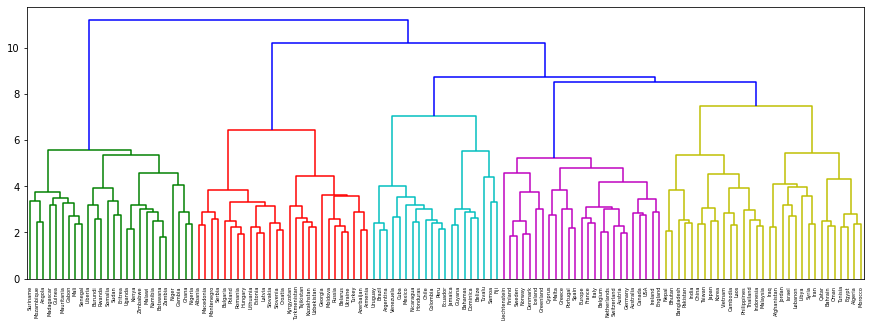

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method="ward")
dendrogram(Z, labels=countries)
plt.show()

### 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [ ]:
!pip install bhtsne

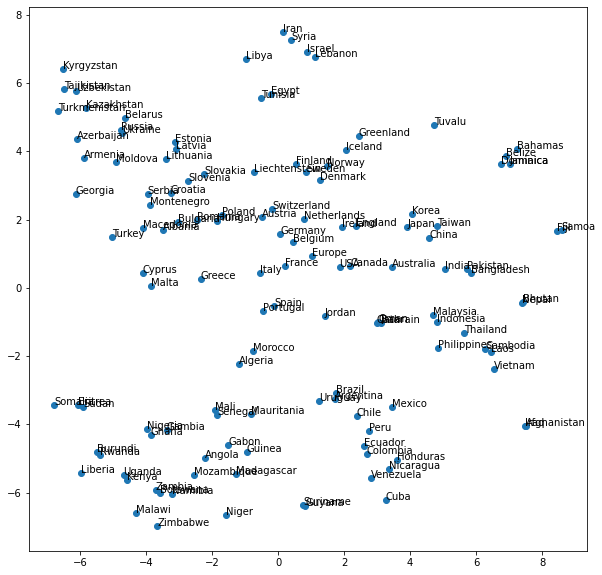

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=0)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()